In [1]:
include("/Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2/scripts/intro.jl")
using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
using LinearAlgebra

using GraphPlot
using Plots
using StatsPlots
using HNProcess
using DataRefine
using PartitioningData
using IterTools
using Random

  Activating 

Currently active project is: HN_V2

Path of active project: /Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!



project at `~/Documents/Research Professor/Mikhail Erementchouk/HN_V2`
[ Info: Precompiling GraphPlot [a2cc645c-3eea-5389-862e-a155d0052231] (cache misses: wrong dep version loaded (4))
[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] (cache misses: wrong dep version loaded (4))
[ Info: Precompiling FileIOExt [f5f51d8f-5827-5d2e-939b-192fcd6ec70c] (cache misses: wrong dep version loaded (4))
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: wrong dep version loaded (4))
[ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd] (cache misses: wrong dep version loaded (4))
[ Info: Precompiling HNProcess [top-level] (cache misses: wrong dep version loaded (2))
[ Info: Precompiling DataRefine [top-level] (cache misses: wrong dep version loaded (2))


In [2]:
sim_time = 4
steps = 3000
parameters = Dict{String, Any}(
    "images" => three_random_orthogonal_image(64),
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]
)
println(length(parameters["images"]))

3


# V2

In [3]:
image_set = orthogonal_image_generator(16)
convergences_16 = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => [],
    "multiple_16" => []
)

times_done = 100
elp = @elapsed begin
    for p in 1:16
        conv_16 = 0
        twos_16 = 0 
        multi_16 = 0
        for i in 1:times_done
            parameters["images"] = image_set[1:p]
            r = HN_Solver(parameters)
            sol_count = 0 
            rots = iterative_rotater_state(r,parameters)
            for st in rots
                if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                    -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_16 += 1
            end
            if sol_count >= 2
                multi_16 += 1 
            end
        end
        push!(convergences_16["image_count"], p)
        push!(convergences_16["conv_16"], conv_16/times_done)
        push!(convergences_16["multiple_16"], multi_16/times_done)
    end
end

println("took $elp seconds")

record_data(convergences_16, parameters, "4by4_hada_RawData_detail_$(times_done)")

p = plot(convergences_16["image_count"], 
    convergences_16["conv_16"], 
    xlabel="Number of Stored Images (p)",
    ylabel="Probability of Convergence",
    ylims=(-0.05, 1.05),
    dpi=400,
    marker=:circle, 
    markersize=3, 
    markercolor=:blue,
    legendtitle="Images Found",
    label="At least one (1+)"
)

plot!(
    convergences_16["image_count"],
    convergences_16["multiple_16"],
    marker=:square, 
    markersize=3, 
    markercolor=:orange,
    label="At least two (2+)"
)
savefig(p, "4by4_hada_detail_$(times_done).png")

┌ Warning: Note: adding edges with a zero weight to this graph type has no effect.
└ @ SimpleWeightedGraphs ~/.julia/packages/SimpleWeightedGraphs/Ab8wv/src/simpleweightedgraph.jl:182


took 6.298760167 seconds
The results are saved to 4by4_hada_RawData_detail_100


"/Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2/scripts/Paper Figures/hadamard stuffs/4by4_hada_detail_100.png"

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
took 139.415250875 seconds


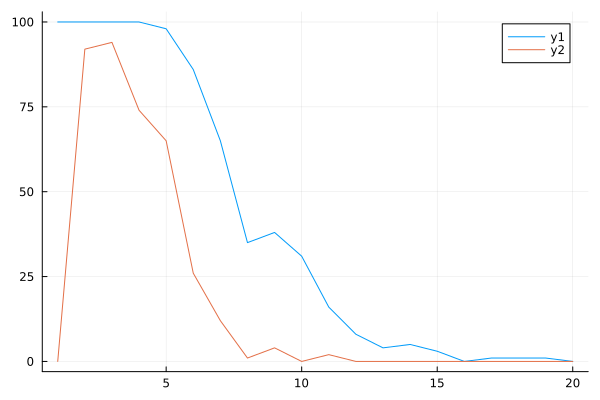

In [42]:
image_set = orthogonal_image_generator(64)
convergences_64 = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => [],
    "multiple_16" => []
)

times_done = 1000
elp = @elapsed begin
    for p in 1:20
        println(p)
        conv_16 = 0
        twos_16 = 0 
        multi_16 = 0
        for i in 1:times_done
            parameters["images"] = image_set[1:p]
            r = HN_Solver(parameters)
            sol_count = 0 
            rots = iterative_rotater_state(r,parameters)
            for st in rots
                if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                    -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_16 += 1
            end
            if sol_count >= 2
                multi_16 += 1 
            end
        end
        push!(convergences_64["image_count"], p)
        push!(convergences_64["conv_16"], conv_16/times_done)
        push!(convergences_64["multiple_16"], multi_16/times_done)
    end
end

record_data(convergences_64, parameters, "8by8_hada_RawData_detail_$(times_done)")
println("took $elp seconds")

p = plot(convergences_64["image_count"], 
    convergences_64["conv_16"], 
    xlabel="Number of Stored Images (p)",
    ylabel="Probability of Convergence",
    ylims=(-0.05, 1.05),
    dpi=400,
    marker=:circle, 
    markersize=3, 
    markercolor=:blue,
    legendtitle="Images Found",
    label="At least one (1+)"
)

plot!(
    convergences_64["image_count"],
    convergences_64["multiple_16"],
    marker=:square, 
    markersize=3, 
    markercolor=:orange,
    label="At least two (2+)"
)
savefig(p, "8by8_hada_detail_$(times_done).png")

1
2


┌ Warning: Note: adding edges with a zero weight to this graph type has no effect.
└ @ SimpleWeightedGraphs ~/.julia/packages/SimpleWeightedGraphs/Ab8wv/src/simpleweightedgraph.jl:182


took 74.611511542 seconds


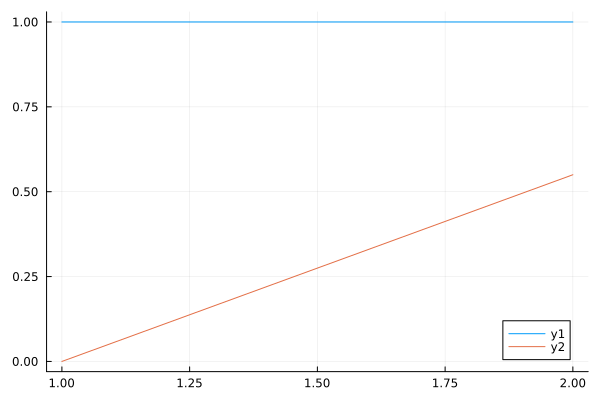

In [6]:
image_set = orthogonal_image_generator(256)
convergences_256 = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => [],
    "multiple_16" => []
)

times_done = 100
elp = @elapsed begin
    for p in 1:25
        println(p)
        conv_16 = 0
        twos_16 = 0 
        multi_16 = 0
        for i in 1:times_done
            parameters["images"] = image_set[1:p]
            r = HN_Solver(parameters)
            sol_count = 0 
            rots = iterative_rotater_state(r,parameters)
            for st in rots
                if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                    -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_16 += 1
            end
            if sol_count >= 2
                multi_16 += 1 
            end
        end
        push!(convergences_256["image_count"], p)
        push!(convergences_256["conv_16"], conv_16/times_done)
        push!(convergences_256["multiple_16"], multi_16/times_done)
    end
end

println("took $elp seconds")

record_data(convergences_256, parameters, "16by16_hada_RawData_detail_$(times_done)")

p = plot(convergences_256["image_count"], 
    convergences_256["conv_16"], 
    xlabel="Number of Stored Images (p)",
    ylabel="Probability of Convergence",
    ylims=(-0.05, 1.05),
    dpi=400,
    marker=:circle, 
    markersize=3, 
    markercolor=:blue,
    legendtitle="Images Found",
    label="At least one (1+)"
)

plot!(
    convergences_256["image_count"],
    convergences_256["multiple_16"],
    marker=:square, 
    markersize=3, 
    markercolor=:orange,
    label="At least two (2+)"
)
savefig(p, "16by16_hada_detail_$(times_done).png")

In [5]:
image_set = orthogonal_image_generator(1024)
convergences_256 = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => [],
    "multiple_16" => []
)


elp = @elapsed begin
    for p in 2:2
        println(p)
        conv_16 = 0
        twos_16 = 0 
        multi_16 = 0
        for i in 1:10
            parameters["images"] = image_set[1:p]
            r = HN_Solver(parameters)
            sol_count = 0 
            rots = iterative_rotater_state(r,parameters)
            for st in rots
                if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                    -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_16 += 1
            end
            if sol_count >= 2
                multi_16 += 1 
            end
        end
        push!(convergences_256["image_count"], p)
        push!(convergences_256["conv_16"], conv_16/10)
        push!(convergences_256["multiple_16"], multi_16/10)
    end
end

println("took $elp seconds")

plot(convergences_256["image_count"], [convergences_256["conv_16"], convergences_256["multiple_16"]])

1


LoadError: InterruptException:

# HN OG

took 6.610878083 seconds


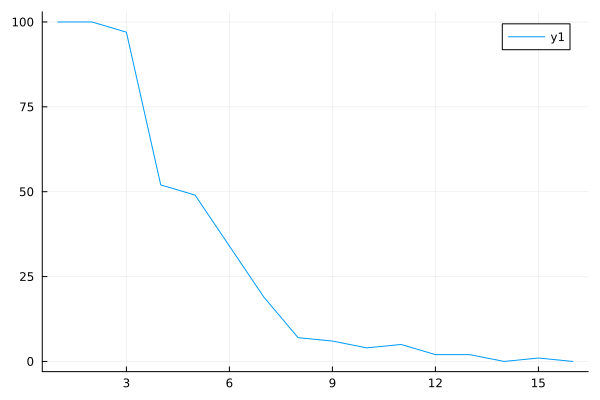

In [40]:
image_set = orthogonal_image_generator(16)
convergences_16_hn = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => []
)
elp = @elapsed begin
    for p in 1:16
        hn_conv_16 =0 
        for i in 1:100
            parameters["images"] = image_set[1:p]
            r = HN_Solver(parameters)
            if (reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                hn_conv_16 +=1 
            end
        end
        push!(convergences_16_hn["image_count"], p)
        push!(convergences_16_hn["conv_16"], hn_conv_16)
    end
end
println("took $elp seconds")

plot(convergences_16_hn["image_count"], [convergences_16_hn["conv_16"]])

took 435.875631917 seconds


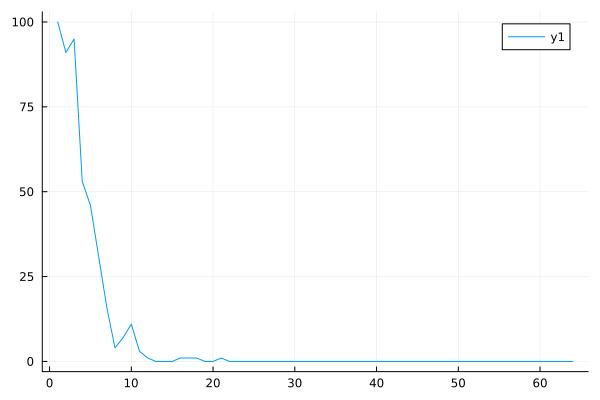

In [41]:
image_set = orthogonal_image_generator(64)
convergences_64_hn = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => []
)
elp = @elapsed begin
    for p in 1:64
        hn_conv_16 =0 
        for i in 1:100
            parameters["images"] = image_set[1:p]
            r = HN_Solver(parameters)
            if (reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                hn_conv_16 +=1 
            end
        end
        push!(convergences_64_hn["image_count"], p)
        push!(convergences_64_hn["conv_16"], hn_conv_16)
    end
end
println("took $elp seconds")

plot(convergences_64_hn["image_count"], [convergences_64_hn["conv_16"]])

In [29]:
image_set = orthogonal_image_generator(256)
convergences_256_hn = Dict{String, Any}(
    "image_count" => [],
    "conv_16" => []
)
elp = @elapsed begin
    for p in 1:256
        hn_conv_16 =0 
        for i in 1:100
            parameters["images"] = image_set[1:p]
            r = HN_Solver(parameters)
            if (reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                hn_conv_16 +=1 
            end
        end
        push!(convergences_256_hn["image_count"], p)
        push!(convergences_256_hn["conv_16"], hn_conv_16)
    end
end
println("took $elp seconds")

plot(convergences_256_hn["image_count"], [convergences_256_hn["conv_16"]])

83
took 199.903060958 seconds


complete_random_image (generic function with 1 method)